### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 停牌或未交易價格資料處理 － 廠商回應：  
  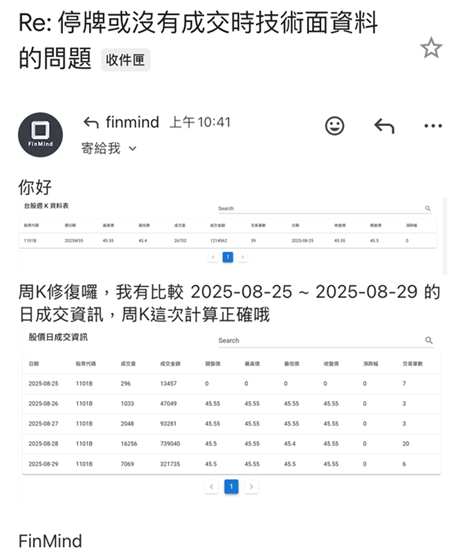  

* 停牌或未交易價格資料處理 － 程式修改：  
  - 修改[StockAnalysis.py](https://github.com/yilintung/StockInvestmentNotebook/commit/fb653b2eeaa0370d91483eb73def3b4d2c916b9d)，增加除錯訊息。  

In [ ]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv, find_dotenv
from FinMind.data import DataLoader

In [ ]:
# 設定FinMind API
load_dotenv(find_dotenv())
token = os.environ.get('FINMIND_TOKEN')
api = DataLoader()
api.login_by_token(api_token=token)

In [ ]:
# 台股週 K 資料表 TaiwanStockWeekPrice (只限 backer、sponsor 會員使用) ： 一次拿特定日期，所有資料(只限 backer、sponsor 使用) #
url = "https://api.finmindtrade.com/api/v4/data"
parameter = {
    "dataset": "TaiwanStockWeekPrice",
    "start_date": '2025-08-25',
    "token": token,
}
resp = requests.get(url, params=parameter)
data = resp.json()
df   = pd.DataFrame(data["data"])

In [ ]:
display(df.iloc[df.index[(df['stock_id']=='1101B')]])

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [ ]:
mysys.UpdateStockDatabase()

* 建立「解盤」物件    

In [3]:
analysis = mysys.StockAnalysis(debug=True)

### 大盤解盤  

* 加權指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

In [ ]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [ ]:
results = analysis.screener()

In [ ]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

* 篩選結果  
  - 飛宏(2457)：穩健續漲  
    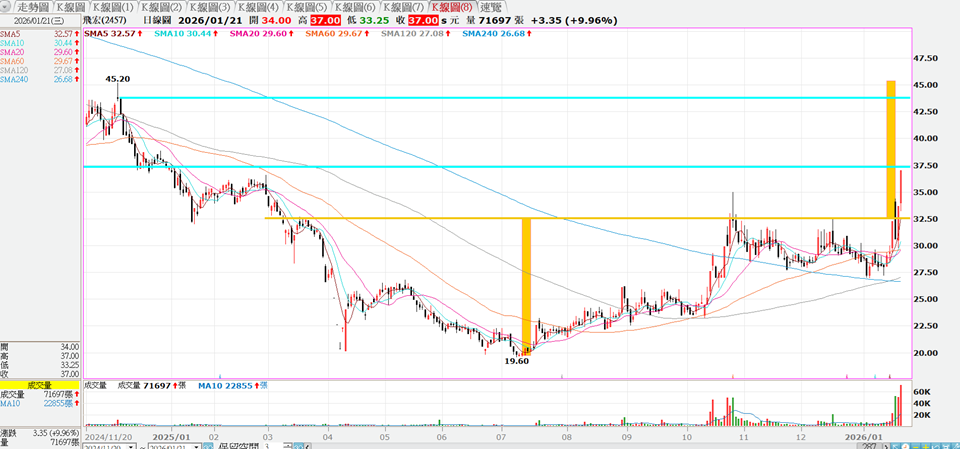  
  - 聯電(2303)：已到目標價  
    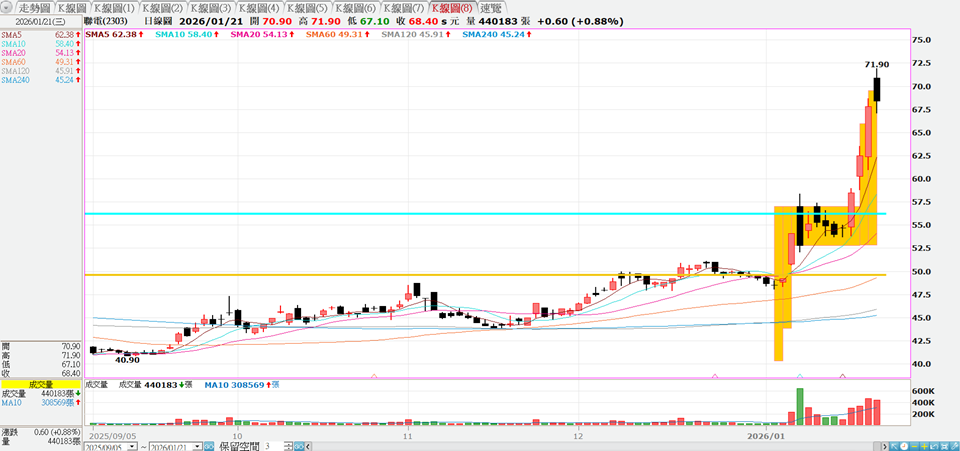  
  - 單井(3490)：盤整觀察  
    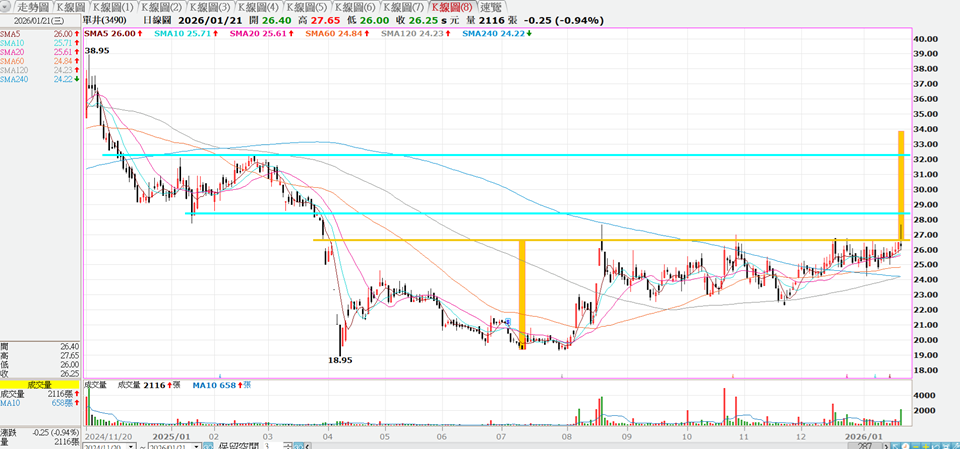  
  - 長科*(6548)：多頭回檔  
    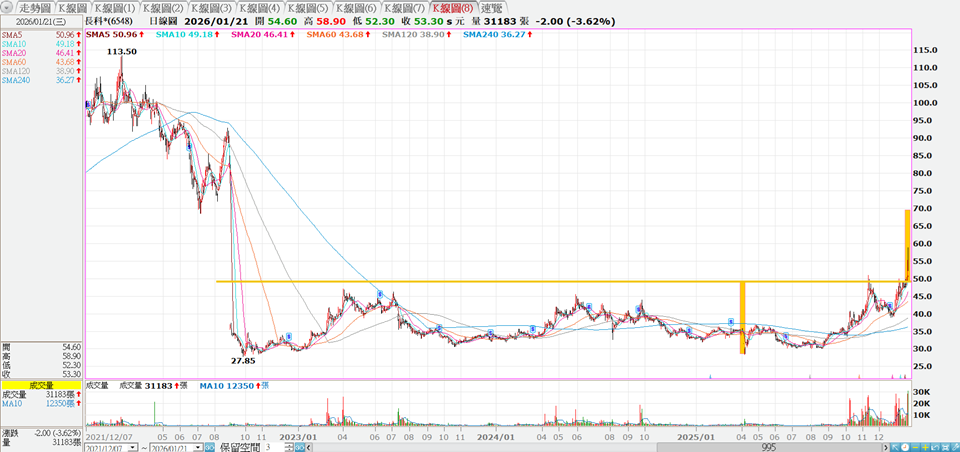    

* 觀察股列表  
  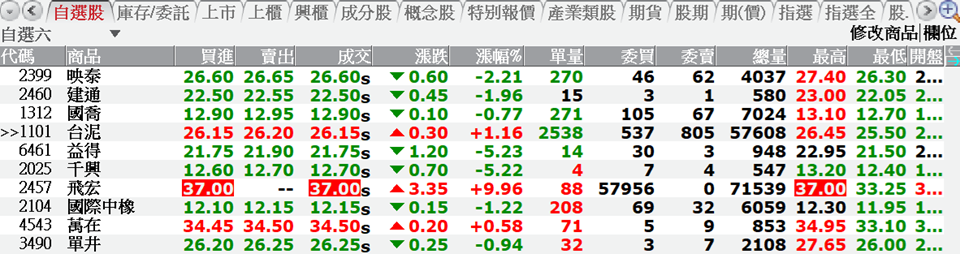   

### 個股解盤  

* 國喬(1312)  
  看法：持續回測頸線支撐。    

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'1312')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-10-23'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-05-09']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-04-09'
    bottom_price = range_prices.loc['2025-04-09']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-12'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('1312','2024-05-14','2026-01-20',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  

* 台泥(1101)  
  看法：反彈，但還未過年線反壓 與前波壓力。  

> **盤後**：量化技術分析  

ＤＥＢＵＧ ： 日Ｋ開始日期 ＝ 2024-01-22 ，日Ｋ結束日期 ＝ 2026-01-21 ， 週Ｋ開始日期 ＝ 2024-01-22 ， 週Ｋ結束日期 ＝ 2026-01-19
ＤＥＢＵＧ ： 〈代碼：1101，日期：2025-08-13〉  修改前：開 ＝ 0.0 高 ＝ 0.0 低 ＝ 0.0 收 ＝ 0.0 ， 修改後：開 ＝ 24.75 高 ＝ 24.75 低 ＝ 24.75 收 ＝ 24.75
ＤＥＢＵＧ ： 轉折點引數列表 ＝ [{'mode': 'close', 'order': 10, 'smoothing': 3}, {'mode': 'open_close', 'order': 5}]
ＤＥＢＵＧ ： 轉折點資料確認範圍 （開始索引 ＝ 0 ，結束索引 ＝ 15） 
ＤＥＢＵＧ ： 底部型態開始索引 ＝ 230 （日期 ＝ 2025-07-15 ） ， 底部型態結束索引 ＝ 352 （日期 ＝ 2026-01-09 ）
ＤＥＢＵＧ ： 趨勢線開始索引 ＝ 0（價格資料開始索引 ＝ 230），趨勢線結束索引 ＝ 122（價格資料結束索引 ＝ 352）
ＤＥＢＵＧ ： 底部型態突破確認範圍 ： 352 ～ 360
ＤＥＢＵＧ ： 確認底部型態突破，收盤價超過頸線３％。價格索引 ＝ 353 ， 日期 ＝ 2026-01-12 ， 突破時頸線價格 ＝ 23.67元 
ＤＥＢＵＧ ： 底部最低價格 ＝ 20.70元 ； 估算目標價 ＝ 27.09元
ＤＥＢＵＧ ： 轉折點資料確認範圍 （開始索引 ＝ 0 ，結束索引 ＝ 16） 
ＤＥＢＵＧ ： ＃ 前轉折高點超過此轉折高點１０％，進行特別處理。前一轉折高點 ＝ 
Date     2025-06-27 00:00:00
Price                   26.2
Type                      HI
Name: 218, dtype: object
此轉折高點 ＝ 
Date     2025-12-05 00:00:00
Price                   23.0
Type                      HI
Name: 329, dtype: object
ＤＥＢＵＧ ： 底部型態開始索引 ＝ 231 （日期 ＝ 2025-07-16

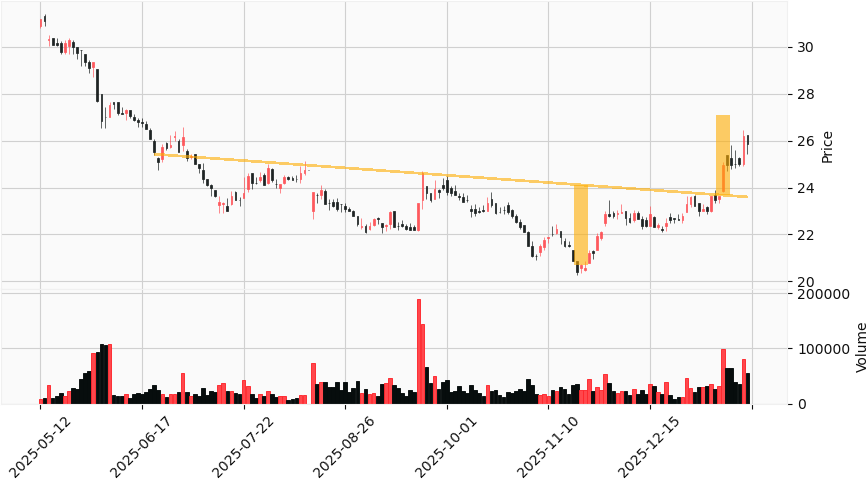

解盤內容：


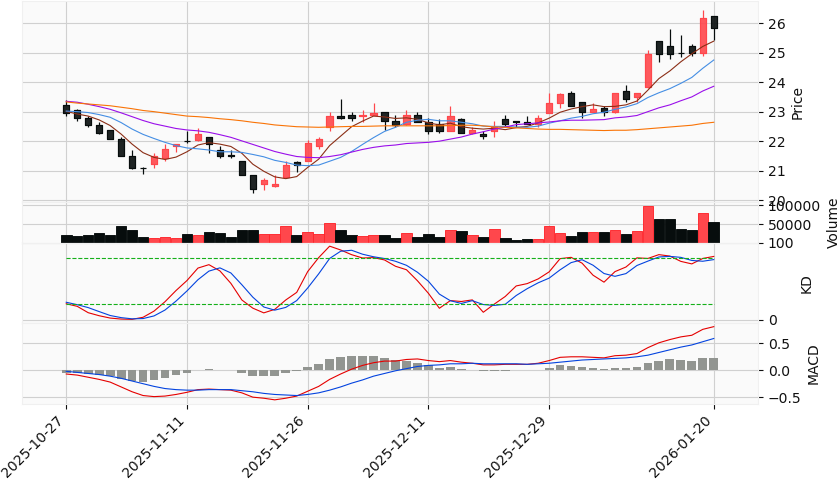

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-01-15 十字線 : 2026-01-15 吞噬 : 2026-01-16 , 2026-01-19 孕育線／懷抱線 : 2026-01-14"
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：成交量大於十日均量，但未至大量門檻（成交量 ＝ 55434張 ，十日均量 ＝ 53046張）
型態,底型反轉之底部型態，型態範圍由2025-06-20開始到2026-01-12結束，估算目標價為27.09元。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2026-01-19黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-17當週黃金交叉。並且2026-01-19該週在超買區。
整體評價,價格趨勢 整體為上漲格局，近期拉升後出現高檔震盪，最新一日收黑但仍守在短期均線之上。短中期均線呈多頭排列（短期在上、中期在下），趨勢結構仍偏多。 價量關係 上漲段伴隨量能放大，突破時有量支持，屬於偏健康的推升。惟最新一日回檔時量能仍不小，顯示高檔有獲利了結與換手，短線波動可能加劇。 支撐與壓力 支撐先看25.45元（近端回檔低點區），跌破則看25.40元（短期均線附近）與24.76元（次短期均線附近）。壓力落在26.25元（近期高點/前高區），若帶量站回其上，才有利續攻並延伸上漲波段。 KD 指標解讀 K、D位於80以上超買區，且K線上彎、K高於D，短線動能仍偏強。惟處於超買區易出現鈍化或拉回，需留意一旦K跌破D，回檔壓力會明顯升高。 MACD 指標解讀 DIF在MACD線之上且兩者同步走升，維持偏多趨勢。柱狀體維持正值並較前期放大後持平，代表多方動能仍在，但短線有從加速轉為高檔整理的跡象。 綜合評價 目前屬多頭趨勢中的高檔震盪：趨勢偏多、動能仍強，但超買與放量回檔使短線風險上升。操作上以守住25.45元/25.40元作為多方續航關鍵，若能重新帶量突破並站穩26.25元，多方結構可望延續。


In [4]:
stock_analysis(analysis,'1101',buttom_pattern = True)

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-04'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-07-30']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-19'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('1101','2025-03-03','2026-01-20',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資○○( )、融券○○( )。  

* 千興(2025)  
  看法：跌破頸線支撐，第二層底型態是否被破壞還待觀察。這檔就先追蹤至今日。     

> **盤後**：量化技術分析  

In [ ]:
stock_analysis(analysis,'2025')

> **盤後**：底部反轉交易策略分析  

In [ ]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-08'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-19']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-15'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

In [ ]:
image = mysys.DrawOnKlineChart('2025','2025-04-01','2026-01-20',line_drawing_callback)
display(image)

籌碼面：  
法人○○( )：外資○○( )、投信○○( )、自營○○( )。  
主力○○( )。  
分公司買賣家數差○○( )。  
融資中立(0)、融券中立(0)。  